# K-Means Clustering for Mall Data

## importing libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv("Mall_Customers.csv")

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## EDA

In [4]:
df.drop(["CustomerID"],axis=1,inplace=True)

In [5]:
df.shape

(200, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [7]:
df.rename(columns={"Annual Income (k$)":"Income",
           "Spending Score (1-100)":"Score"},inplace=True)

In [8]:
df

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Income,200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


In [10]:
df.nunique()

Gender     2
Age       51
Income    64
Score     84
dtype: int64

In [11]:
df.isnull().sum()

Gender    0
Age       0
Income    0
Score     0
dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

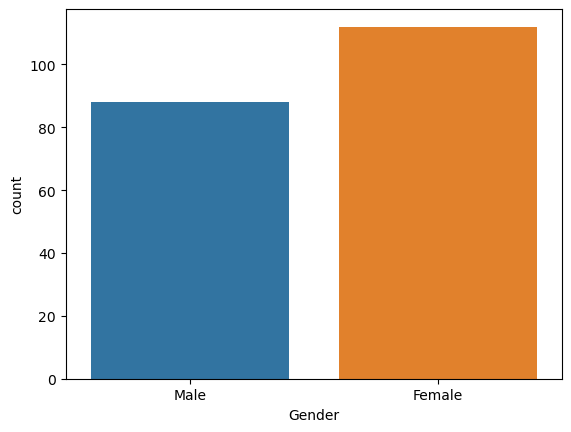

In [12]:
sns.countplot(data=df,x='Gender')

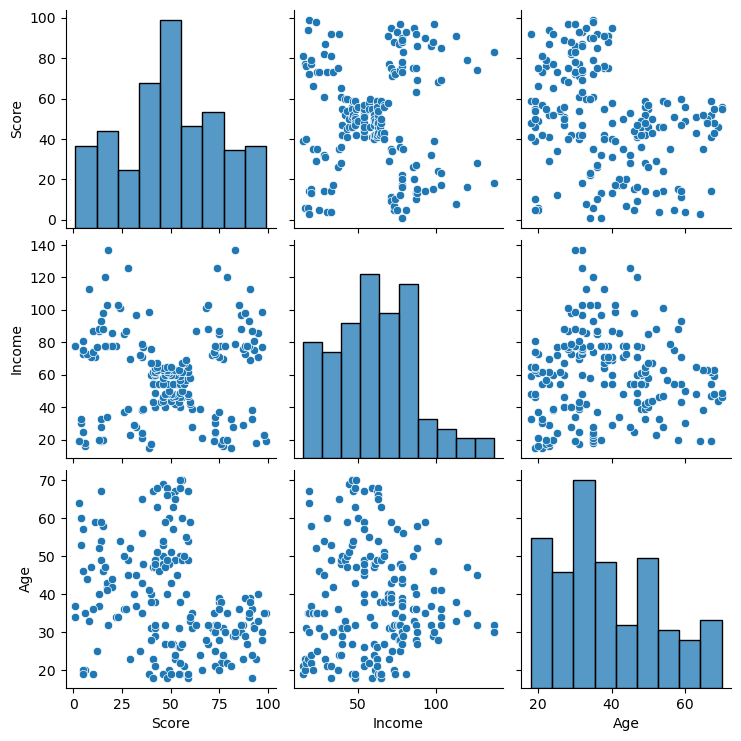

In [13]:
sns.pairplot(df, vars = ['Score', 'Income', 'Age'])


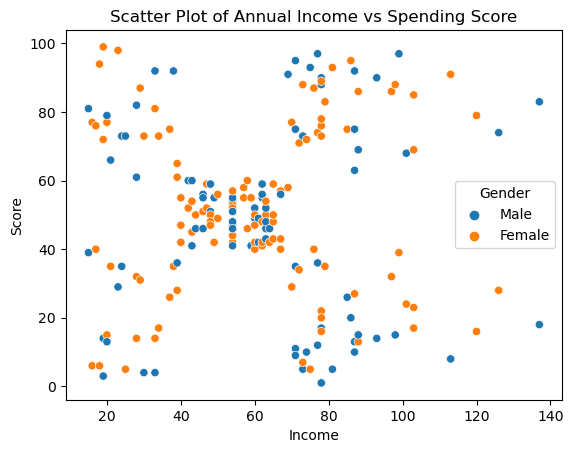

In [14]:
sns.scatterplot(x='Income', y='Score', data=df, hue='Gender')

plt.title('Scatter Plot of Annual Income vs Spending Score')
plt.show()

## Features Selection

In [15]:
features = df[['Age', 'Income', 'Score']]

inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

inertia

c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

[308812.77999999997,
 212840.16982097185,
 143342.751571706,
 104366.151455562,
 75350.77917248776,
 58300.4433215907,
 51084.50595493436,
 44344.94980177717,
 40953.73845841784]

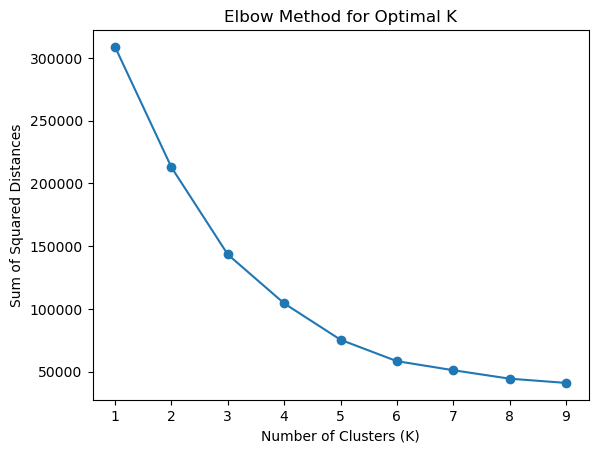

In [16]:
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal K')
plt.show()

## Model Training

In [17]:
kmeans = KMeans(n_clusters=5, random_state=0, n_init=10)
df['Cluster'] = kmeans.fit_predict(features);

c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


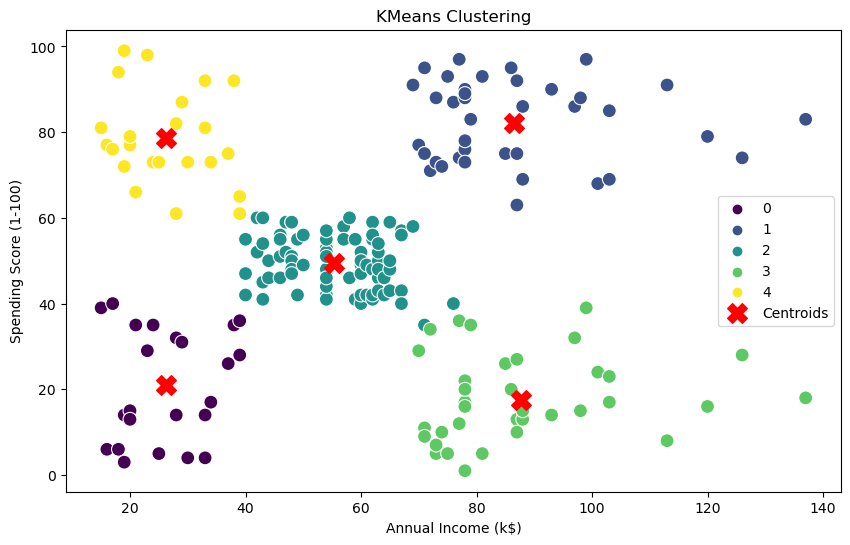

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Score', hue='Cluster', data=df, palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=200, c='red', marker='X', label='Centroids')
plt.title('KMeans Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## Prediction

In [19]:
output_clsuter=kmeans.predict([[19,15,39]])
output_clsuter[0]

c:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


0

In [20]:
import gradio as gr

def predict_fn(age,income,score):
    array=np.asarray([[age,income,score]])
    output_clsuter=kmeans.predict(array)
    return output_clsuter[0]


demo = gr.Interface(
    predict_fn,
    [
        gr.Number(label="Age",minimum=15,maximum=100),
        gr.Number(label="Annual Income (k$)"),
        gr.Number(label="Spending score",minimum=0,maximum=100)
    ],
    gr.Number(label='Cluster Number'),
    examples=[
        [21, 15,81],
        [21, 15,31],
        [30, 90,72],
    ],
)

demo.launch()


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


c:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
